In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# warning removal
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv(r"C:\Users\harik\Downloads\Fraud Detection Dataset 01.csv")
#head of the data
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [3]:
#checking data types
df.dtypes

Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object

In [4]:
#checking for missing values
df.isnull().sum()

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [5]:
#checking for duplicates
df.duplicated().sum()

881

In [6]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [7]:
#filling missing values categorical data with mode and numerical data with mean
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode().values[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [8]:
#checking for missing values
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [9]:
#Composition of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50119 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    50119 non-null  object 
 1   User_ID                           50119 non-null  int64  
 2   Transaction_Amount                50119 non-null  float64
 3   Transaction_Type                  50119 non-null  object 
 4   Time_of_Transaction               50119 non-null  float64
 5   Device_Used                       50119 non-null  object 
 6   Location                          50119 non-null  object 
 7   Previous_Fraudulent_Transactions  50119 non-null  int64  
 8   Account_Age                       50119 non-null  int64  
 9   Number_of_Transactions_Last_24H   50119 non-null  int64  
 10  Payment_Method                    50119 non-null  object 
 11  Fraudulent                        50119 non-null  int64  
dtypes: float6

In [10]:
#Descriptive analysis
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000,50119.000000
mean,3004.733195,2999.104599,11.488575,1.996448,60.029071,7.495640,0.049223
std,1152.620471,4934.602301,6.746058,1.415492,34.392569,4.019806,0.216335
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1333.370000,6.000000,1.000000,30.000000,4.000000,0.000000
50%,2997.000000,2655.340000,11.488575,2.000000,60.000000,7.000000,0.000000
75%,4005.000000,3721.755000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


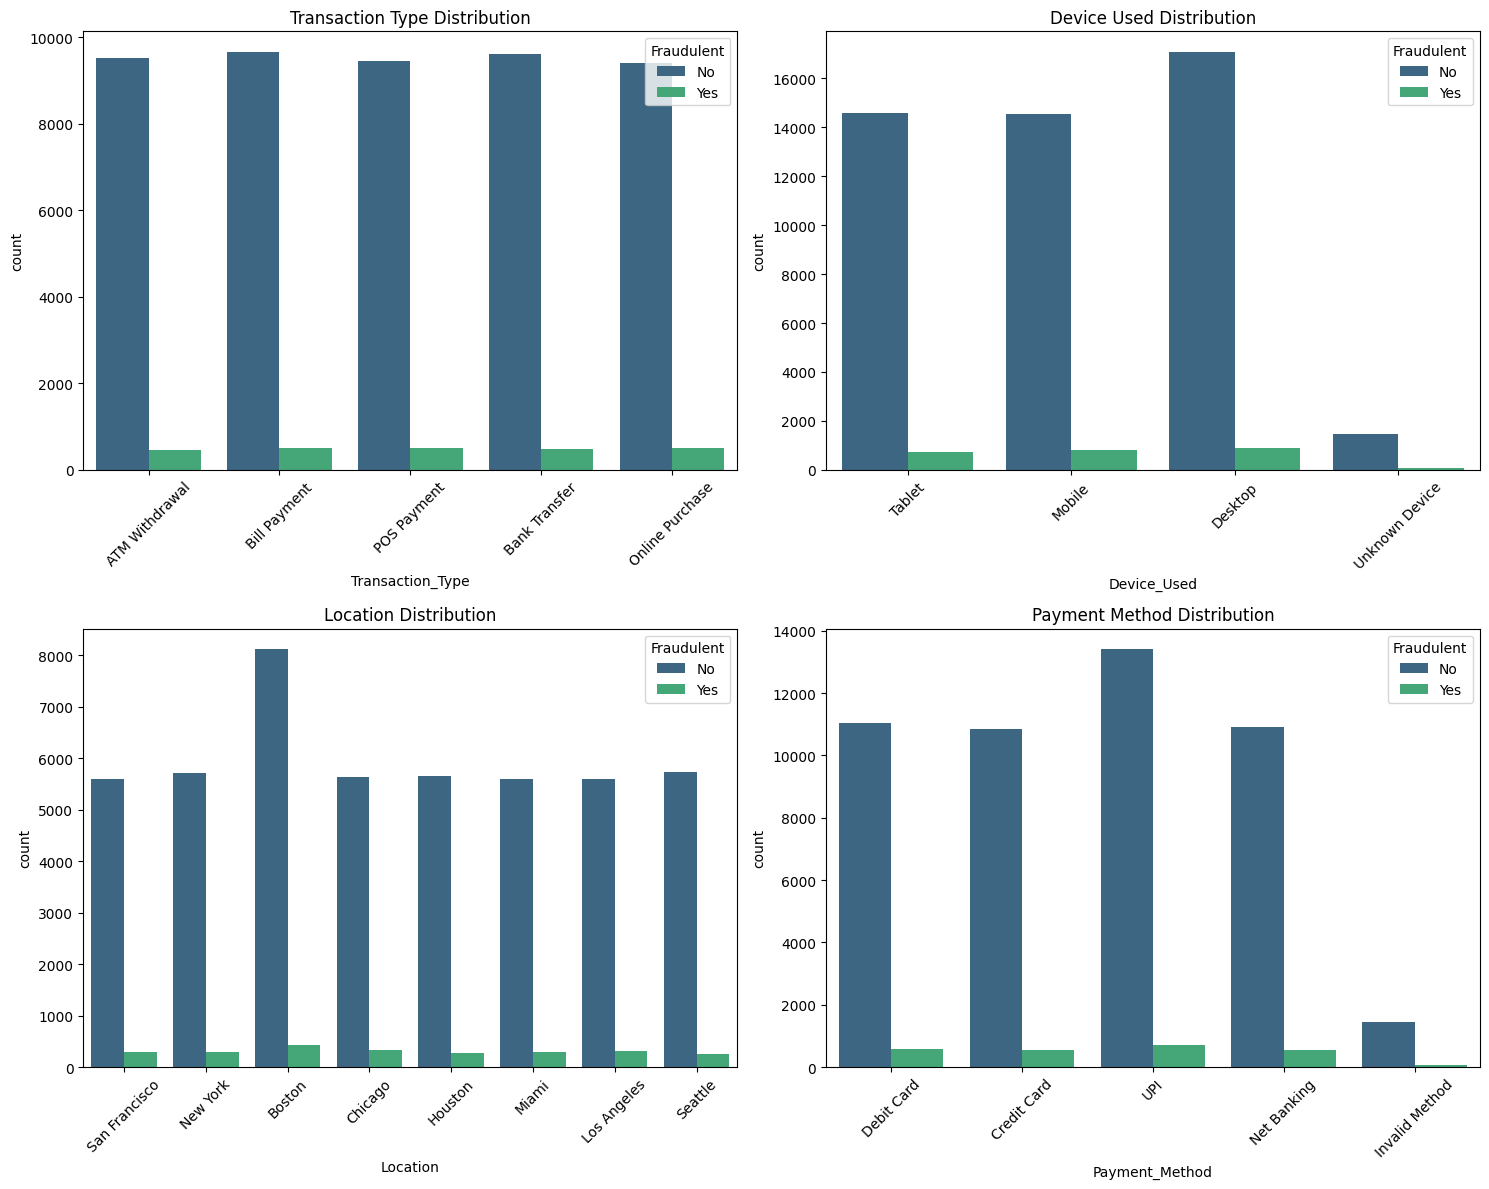

In [11]:
# Creating the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 columns

# Define categorical columns
categories = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
titles = ['Transaction Type Distribution', 'Device Used Distribution', 'Location Distribution', 'Payment Method Distribution']

# Loop through categories and create countplots
for ax, category, title in zip(axes.flatten(), categories, titles):
    sns.countplot(data=df, x=category, palette='viridis', hue='Fraudulent', ax=ax)
    ax.legend(title='Fraudulent', labels=['No', 'Yes'])
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

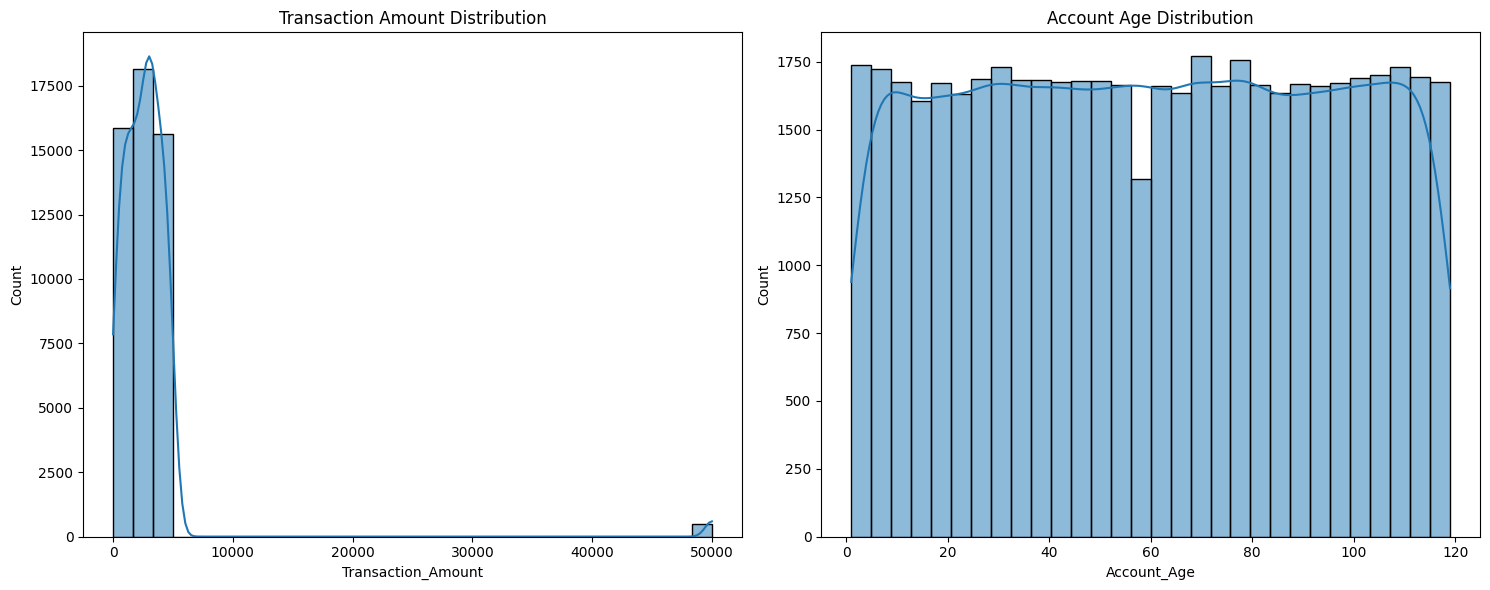

In [12]:
# Creating subplots for numerical features
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Transaction Amount
sns.histplot(data=df, x='Transaction_Amount', bins=30, kde=True, palette='viridis', ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')

# Histogram for Account Age
sns.histplot(data=df, x='Account_Age', bins=30, kde=True, palette='viridis', ax=axes[1])
axes[1].set_title('Account Age Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [13]:
#removing the columns that are not needed Transaction_ID, User_ID
df.drop(['Transaction_ID', 'User_ID'], axis=1, inplace=True)
df.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,ATM Withdrawal,16.000000,Tablet,San Francisco,0,119,13,Debit Card,0
1,1554.58,ATM Withdrawal,13.000000,Mobile,New York,4,79,3,Credit Card,0
2,2395.02,ATM Withdrawal,11.488575,Mobile,Boston,3,115,9,UPI,0
3,100.10,Bill Payment,15.000000,Desktop,Chicago,4,3,4,UPI,0
4,1490.50,POS Payment,19.000000,Mobile,San Francisco,2,57,7,Credit Card,0


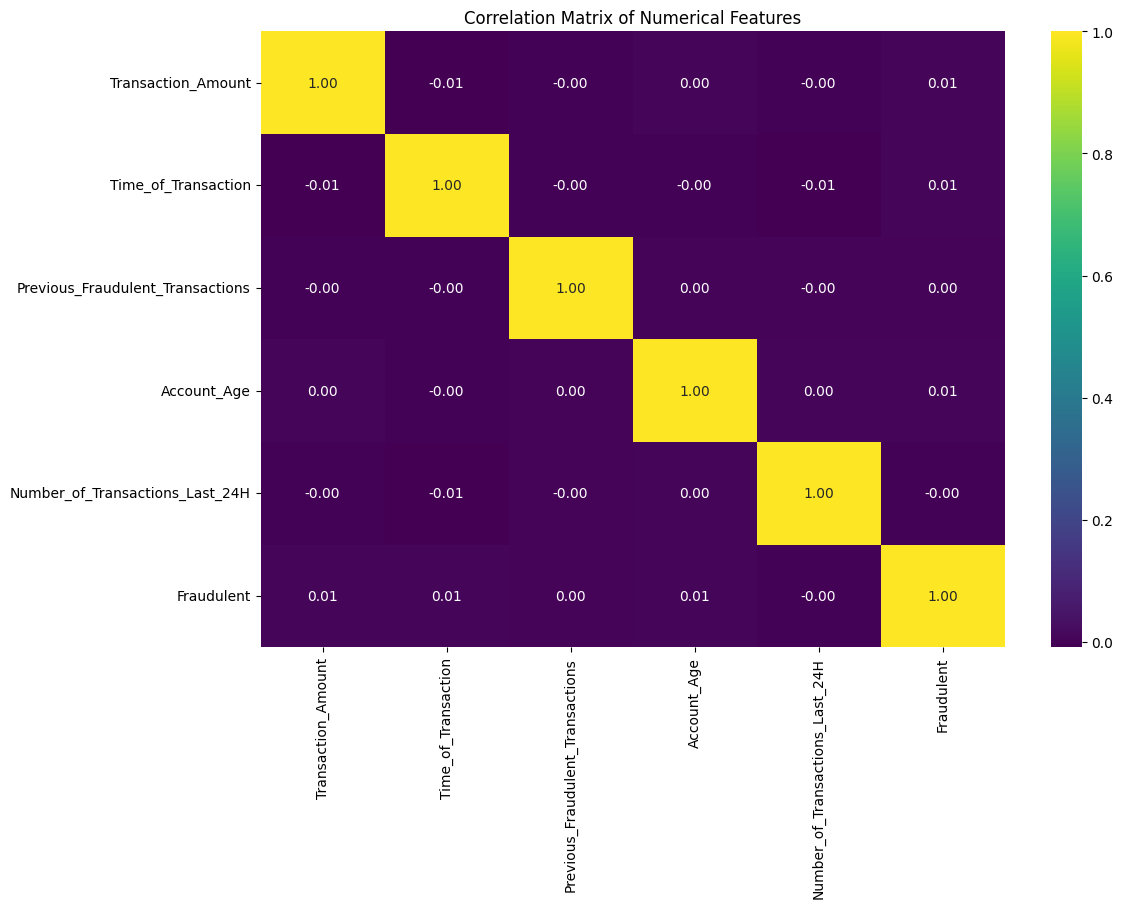

In [14]:
# Correlation matrix of numerical features
corr_matrix = df.corr(numeric_only=True)
#plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [15]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encoding categorical features
df['Transaction_Type'] = le.fit_transform(df['Transaction_Type'])
df['Device_Used'] = le.fit_transform(df['Device_Used'])
df['Location'] = le.fit_transform(df['Location'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
# Display the head of the data
df.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,0,16.000000,2,6,0,119,13,1,0
1,1554.58,0,13.000000,1,5,4,79,3,0,0
2,2395.02,0,11.488575,1,0,3,115,9,4,0
3,100.10,2,15.000000,0,1,4,3,4,4,0
4,1490.50,4,19.000000,1,6,2,57,7,0,0


In [16]:
#Balancing the data
from imblearn.over_sampling import SMOTE
# Define the features and target
X = df.drop('Fraudulent', axis=1)
y = df['Fraudulent']
# Instantiate SMOTE
smote = SMOTE(random_state=42)
# Fit and apply SMOTE
X_smote, y_smote = smote.fit_resample(X, y)
# Display the shape of X and y after applying SMOTE
X_smote.shape, y_smote.shape

((95304, 9), (95304,))

In [17]:
y_smote.value_counts()

Fraudulent
0    47652
1    47652
Name: count, dtype: int64

In [18]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
# Instantiate StandardScaler
scaler = StandardScaler()
# Fit and transform X_smote
X_scaled = scaler.fit_transform(X_smote)

In [19]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)
# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76243, 9), (19061, 9), (76243,), (19061,))

In [20]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
# Fit the model
rf.fit(X_train, y_train)
# Predict the target
y_pred = rf.predict(X_test)
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91      9588
           1       0.89      0.93      0.91      9473

    accuracy                           0.91     19061
   macro avg       0.91      0.91      0.91     19061
weighted avg       0.91      0.91      0.91     19061

Accuracy: 0.9083993494570064


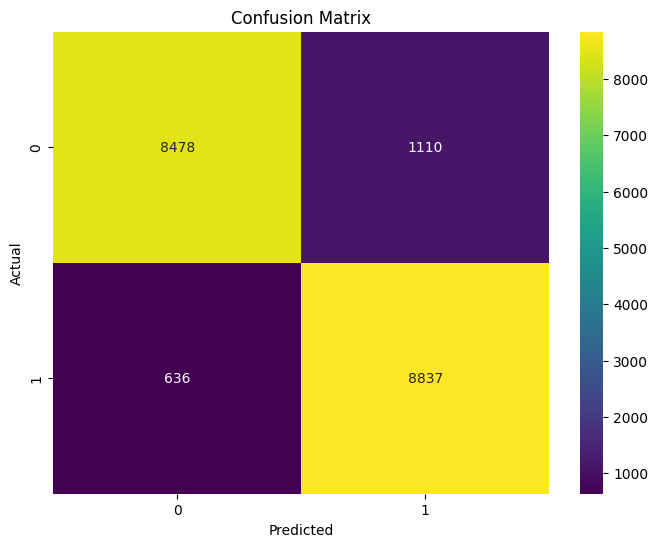

In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

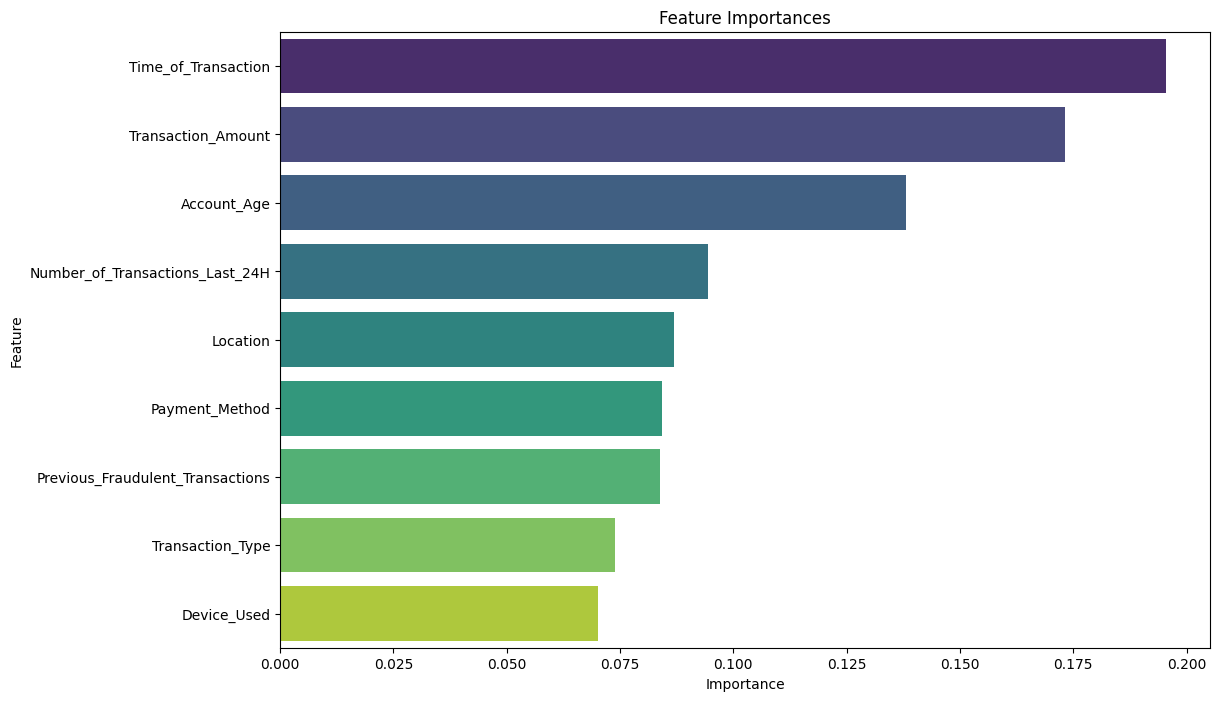

In [22]:
#Feature Importance
# Get feature importance
importances = rf.feature_importances_
# Create a DataFrame
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# Sort values
feature_importances = feature_importances.sort_values('Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.show()

In [23]:
# --- Prediction code starts here ---

# Input dictionary (change these values for different predictions)
input_data = {
    'Transaction_Amount': 544.810000,
    'Transaction_Type': 2,
    'Time_of_Transaction': 2.000000,
    'Device_Used': 2,
    'Location': 0,
    'Previous_Fraudulent_Transactions': 3,
    'Account_Age': 6,
    'Number_of_Transactions_Last_24H': 9,
    'Payment_Method': 4
}

# Convert input to DataFrame
input_df = pd.DataFrame([input_data])

# Refit encoders on full DataFrame for prediction (this won't affect the model)
le_tt = LabelEncoder()
le_du = LabelEncoder()
le_loc = LabelEncoder()
le_pm = LabelEncoder()

le_tt.fit(df['Transaction_Type'])
le_du.fit(df['Device_Used'])
le_loc.fit(df['Location'])
le_pm.fit(df['Payment_Method'])

# Apply encoders to input
input_df['Transaction_Type'] = le_tt.transform(input_df['Transaction_Type'])
input_df['Device_Used'] = le_du.transform(input_df['Device_Used'])
input_df['Location'] = le_loc.transform(input_df['Location'])
input_df['Payment_Method'] = le_pm.transform(input_df['Payment_Method'])

# Scale the input using the trained scaler
input_scaled = scaler.transform(input_df)

# Make the prediction
prediction = rf.predict(input_scaled)

# Output the result
if prediction[0] == 1:
    print("This transaction is predicted to be FRAUDULENT.")
else:
    print("This transaction is predicted to be NOT FRAUDULENT.")


This transaction is predicted to be FRAUDULENT.


In [24]:
import pyttsx3

# Initialize the speaker engine
engine = pyttsx3.init()

# Set voice rate (default is ~200)
engine.setProperty('rate', 130)  # You can reduce it even more if needed

# Set volume (0.0 to 1.0)
engine.setProperty('volume', 1.0)  # Max volume

# You can also set voice (male/female) if you want
# voices = engine.getProperty('voices')
# engine.setProperty('voice', voices[1].id)  # 0 = male, 1 = female (depends on system)

# Your result text
if prediction[0] == 1:
    result_text = "This transaction is predicted to be fraudulent."
else:
    result_text = "This transaction is predicted to be not fraudulent."

# Print and speak
print("🔊 " + result_text)
engine.say(result_text)
engine.runAndWait()


🔊 This transaction is predicted to be fraudulent.


In [25]:
import joblib

# Save the trained model and preprocessors
joblib.dump(rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_tt, "le_tt.pkl")
joblib.dump(le_du, "le_du.pkl")
joblib.dump(le_loc, "le_loc.pkl")
joblib.dump(le_pm, "le_pm.pkl")


['le_pm.pkl']